In [1]:
import tensorflow as tf
import numpy as no
import matplotlib.pyplot as plt
import numpy as np
import time
import os

In [2]:
tags=["Perf/Episode_Length",
      "Perf/Value",
      "Perf/Reward",
      "Perf/Kills",
      "Perf/Health",
      "Perf/Ammo",
      "Losses/Value Loss",
      "Losses/Policy Loss",
      "Losses/Entropy",
      "Losses/Inverse Loss",
      "Losses/Forward Loss"]

In [3]:
# for i in range(12):
#     directory = os.path.join("deadly_corridor_ayman","train_"+str(i))
#     print(directory)
#     event_file = os.listdir(directory)[0]
#     for e in tf.train.summary_iterator(os.path.join(directory,event_file)):
#         for v in e.summary.value:
#             print(v.tag)
# #             for tag in tags :
# #                 if v.tag == tag:
# #                     all_trainers["trainer_"+str(i)][tag].append(v.simple_value)

In [5]:
scenario = 'deadly_corridor'
curiosity = False

def get_perfs(scenario, curiosity = False, summaries_info={}):
    summaries = [summary for summary in os.listdir("./") if scenario in summary]
    if curiosity:
        summaries = [summary for summary in summaries if "curiosity" in summary]
        scenario+="_curiosity"
    else:
        summaries = [summary for summary in summaries if "curiosity" not in summary]

    summaries_info[scenario] = {}
    for tag in tags:
        summaries_info[scenario][tag] = []

    for summary in summaries:
        if "ayman" in summary and "deadly_corridor" in scenario:
            j=1
        else:
            j=0

        all_trainers = {}
        for i in range(j,12):
            all_trainers["trainer_"+str(i)] = {}
            for tag in tags:
                all_trainers["trainer_"+str(i)][tag] = []

        for i in range(j,12):
            directory = os.path.join(summary,"train_"+str(i))
            event_file = os.listdir(directory)[0]
            for e in tf.train.summary_iterator(os.path.join(directory,event_file)):
                for v in e.summary.value:
                    for tag in tags :
                        if v.tag == tag:
                            all_trainers["trainer_"+str(i)][tag].append(v.simple_value)

        mean_tags = {}
        for tag in tags:
            mean_tags[tag] = []

        for i in range(j,12):
            for tag in tags:
                mean_tags[tag].append(all_trainers["trainer_"+str(i)][tag])

        for tag in tags:
            mean_tags[tag] = np.mean(mean_tags[tag], axis=0)
            summaries_info[scenario][tag].append(list(mean_tags[tag]))

    for tag in tags:
        summaries_info[scenario][tag] = np.array(summaries_info[scenario][tag])

    return summaries_info

In [6]:
summaries_info = get_perfs(scenario="deadly_corridor", curiosity=False)
summaries_info = get_perfs(scenario="deadly_corridor", curiosity=True, summaries_info=summaries_info)

#summaries_info = get_perfs(scenario="deadly_corridor", curiosity=False, summaries_info=summaries_info)

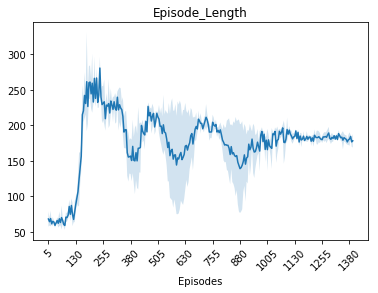

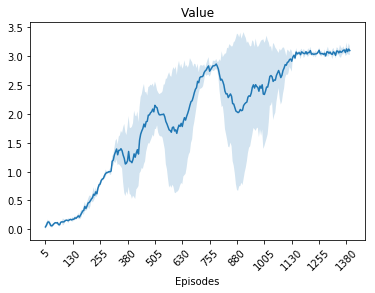

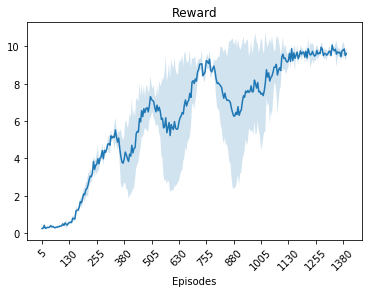

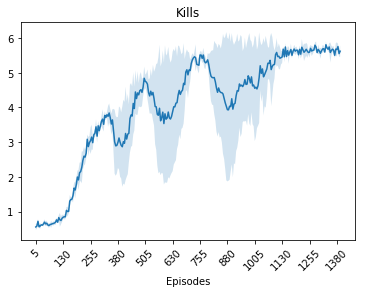

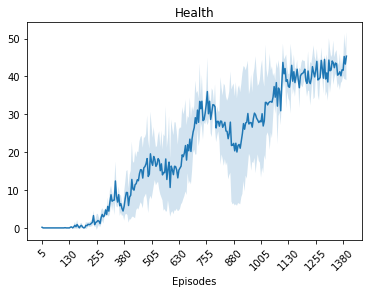

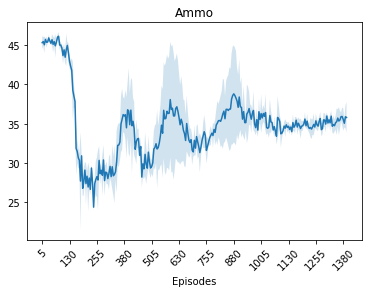

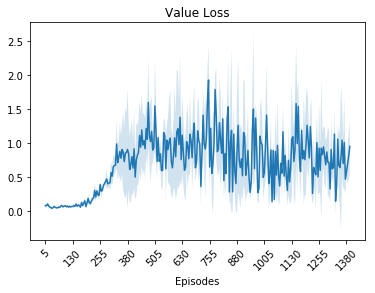

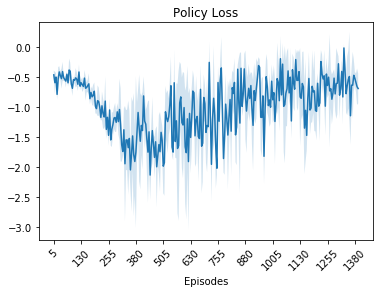

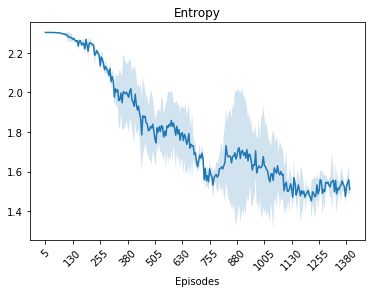

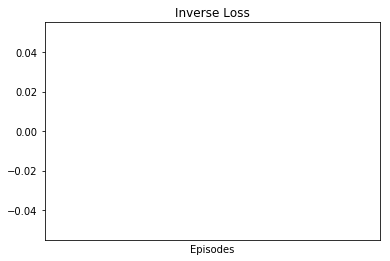

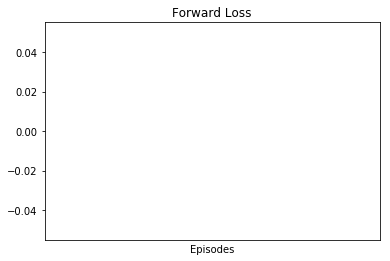

In [7]:
for tag in summaries_info["deadly_corridor"].keys():
    std = summaries_info["deadly_corridor"][tag].std(axis=0)
    mean = summaries_info["deadly_corridor"][tag].mean(axis=0)
    plt.plot(mean)
    plt.fill_between(np.arange(mean.shape[0]), 
                     mean+std, 
                     mean-std, alpha=0.2)
    plt.title(tag.split("/")[-1])
    plt.xticks(list(range(0,mean.shape[0],25)), list(range(5,1395,5*25)), rotation=45)
    plt.xlabel("Episodes")

    plt.show()

[]

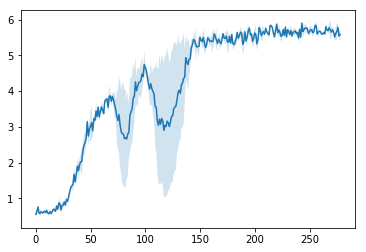

In [60]:
plt.plot(mean)

plt.fill_between(np.arange(mean.shape[0]), 
                 mean+std, 
                 mean-std, alpha=0.2)

plt.plot()